**Load dataset**

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

import sklearn.metrics as sm
from sklearn.metrics import adjusted_mutual_info_score,homogeneity_completeness_v_measure

from sklearn.decomposition import PCA,FastICA,TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from scipy.stats import kurtosis,entropy

derm = np.loadtxt("./dermatology2.csv", delimiter=",") #Required deleting the '?' values
print(derm.shape)

# store feature matrix in "X"
#X = derm[:,0:33]
X = derm[:,0:33]

# store response vector in "y"
#y = derm[:,34]
y = derm[:,34]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(358, 35)
(286, 33) (286,)
(72, 33) (72,)


0     0.351497
1     0.188875
2     0.074642
3     0.047177
4     0.037894
5     0.033884
6     0.026767
7     0.024405
8     0.021857
9     0.020613
10    0.019708
11    0.017181
12    0.015547
13    0.014565
14    0.011931
15    0.010542
16    0.010211
17    0.009722
18    0.009112
19    0.008233
20    0.006907
21    0.005962
22    0.004474
23    0.004398
24    0.004017
25    0.003877
26    0.003266
27    0.002995
28    0.002796
29    0.002691
30    0.002137
31    0.001578
32    0.000540
dtype: float64
0.967234174696725


Text(0, 0.5, 'Variance')

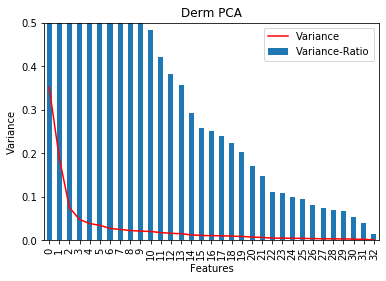

In [4]:
pca = PCA()
pca.fit_transform(X)
pca_res = pd.Series(pca.explained_variance_ratio_)
pca_var = pd.Series(pca.explained_variance_)
loss = 0.005

print (pca_res)
variance = 0
for x in pca_res:
        if x >= loss:
            variance += x
print (variance)

pca_res.plot(c = 'r',label = 'Variance')
ax = pca_var.plot(kind = 'bar',ylim = (0.,0.5),label = "Variance-Ratio")
plt.legend()

plt.title("Derm PCA")
plt.xlabel("Features")
plt.ylabel("Variance")

In [5]:
pca = PCA(22)
temp = pca.fit_transform(X)
diff = X - pca.inverse_transform(temp)
print(22)
print("MEAN", np.mean(diff))
print("STD", np.std(diff))
print("MAX", np.max(diff))
print("MIN", np.min(diff))

22
MEAN 1.2367136451724276e-17
STD 0.1558864249478629
MAX 1.467519377347649
MIN -2.12304555311176


# ICA

0.967234174696725
12  out of  33


Text(0, 0.5, 'Kurtosis')

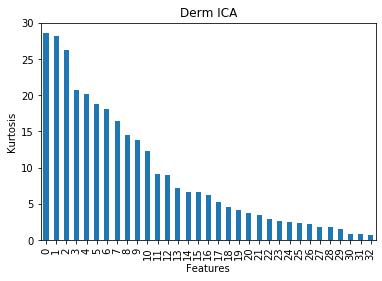

In [7]:
ica = FastICA(tol = 0.005)
temp = ica.fit_transform(X)
order = [-abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]
temp = temp[:,np.array(order).argsort()]
ica_res =  pd.Series([abs(kurtosis(temp[:,i])) for i in range(temp.shape[1])]);

variance = 0
reduced = 0
for x in pca_res:
        if x >= loss:
            variance += x
            reduced +=1
print (variance)
print (1 +X.shape[1] - reduced, " out of ", X.shape[1])

ax = ica_res.plot(kind = 'bar');
plt.title("Derm ICA")
plt.xlabel("Features")
plt.ylabel("Kurtosis")

In [8]:
for i in range(20,23):
    ica = FastICA(i,tol = 0.005)
    temp = ica.fit_transform(X)
    diff = X - ica.inverse_transform(temp)
    print(i)
    print("MEAN", np.mean(diff))
    print("STD", np.std(diff))
    print("MAX", np.max(diff))
    print("MIN", np.min(diff))

20
MEAN 8.570538331286125e-18
STD 0.1839686483675256
MAX 1.7709329511241378
MIN -2.134096849761751


/home/kellgon/.local/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


21
MEAN 8.720898652887636e-18
STD 0.1694761058368465
MAX 1.645617379089737
MIN -2.1250679018627254
22
MEAN 6.352723587663838e-18
STD 0.15588642494786287
MAX 1.4675193773476494
MIN -2.1230455531117567


/home/kellgon/.local/lib/python3.6/site-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


# RCA

In [29]:
grp = GaussianRandomProjection(n_components = 11)
grp.fit(X)
transformed = grp.transform(X)
pseudo = grp.components_.T
reconstructed = np.dot(X,pseudo)
print (reconstructed)

print("MEAN", np.mean(reconstructed))
print("STD", np.std(reconstructed))
print("MAX", np.max(reconstructed))
print("MIN", np.min(reconstructed))



[[ 1.60272014 -2.11906335 -4.07384269 ... -1.33791049 -0.65747947
  -2.01235324]
 [ 4.22779083 -6.08348628 -3.44215517 ...  2.11632446 -0.14275058
  -0.12444404]
 [ 0.46127863 -2.2835206  -4.03701052 ... -2.67061666  2.38437072
   0.93563192]
 ...
 [ 4.17257043 -1.83030635 -4.70488746 ... -0.42769696  1.09222999
  -0.21189724]
 [ 4.11318131 -0.46305439 -3.40091531 ... -0.35736833 -0.95501697
   0.09983061]
 [ 1.84606322 -2.39875884 -3.7101969  ...  3.58922358 -1.33877895
   1.74848843]]
MEAN -0.14379824509349892
STD 2.014088725429342
MAX 5.973844680903739
MIN -7.280495919471319


# LDA

0    0.642723
1    0.150587
2    0.113517
3    0.083710
4    0.009462
dtype: float64
0.9905379889007557


/home/kellgon/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(33, 6 - 1) = 5 components.
  ChangedBehaviorWarning)
/home/kellgon/.local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


Text(0, 0.5, 'Variance')

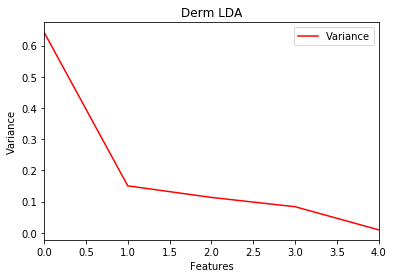

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='eigen', n_components=11)
lda.fit_transform(X, y)
lda_res = pd.Series(lda.explained_variance_ratio_)
loss = 0.05

print (lda_res)
variance = 0
for x in lda_res:
        if x >= loss:
            variance += x
print (variance)

lda_res.plot(c = 'r',label = 'Variance')
#ax = pca_var.plot(kind = 'bar',ylim = (0.,0.5),label = "Variance-Ratio")
plt.legend()

plt.title("Derm LDA")
plt.xlabel("Features")
plt.ylabel("Variance")

# SVD

0     0.080911
1     0.351277
2     0.140977
3     0.070037
4     0.043670
5     0.037756
6     0.030763
7     0.024569
8     0.024349
9     0.021437
10    0.019896
11    0.017200
12    0.015644
13    0.014576
14    0.012428
15    0.010556
16    0.010241
17    0.010013
18    0.009220
19    0.008440
20    0.006912
21    0.005972
22    0.004480
23    0.004412
24    0.004044
25    0.003931
26    0.003369
27    0.003013
28    0.002812
29    0.002795
30    0.002168
31    0.001595
dtype: float64
0.9668418030429269
Reduced  12  out of  33


Text(0, 0.5, 'Variance')

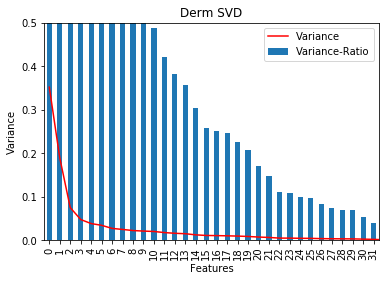

In [33]:
svd = TruncatedSVD(n_components = X.shape[1]-1)
temp = svd.fit_transform(X)
svd_res = pd.Series(svd.explained_variance_ratio_)
svd_var = pd.Series(svd.explained_variance_)

loss = 0.005

print (svd_res)
variance = 0
reduced = 0
for x in svd_res:
        if x >= loss:
            variance += x
            reduced +=1
print (variance)
print ("Reduced ", 1 +X.shape[1] - reduced, " out of ", X.shape[1])

pca_res.plot(c = 'r',label = 'Variance')
ax = svd_var.plot(kind = 'bar',ylim = (0.,0.5),label = "Variance-Ratio")
plt.legend()

plt.title("Derm SVD")
plt.xlabel("Features")
plt.ylabel("Variance")

In [34]:
svd = TruncatedSVD(n_components = X.shape[1]-1)
temp = svd.fit_transform(X)
diff = X - svd.inverse_transform(temp)
print(3)
print("MEAN", np.mean(diff))
print("STD", np.std(diff))
print("MAX", np.max(diff))
print("MIN", np.min(diff))

3
MEAN -1.0593322004923599e-07
STD 0.020011299819267855
MAX 0.5398029008513023
MIN -0.6226774127047054
